# Applied Mathematics 115: Mathematical Modeling  
---
*2024 Spring / Full Term*

**Meeting Time:**  
Tuesday 10:30 AM - 11:45 AM  
Thursday 10:30 AM - 11:45 AM
<br>
<br>

**Instructors:**  
*Michael P. Brenner* (Pierce Hall 313) brenner@seas.harvard.edu  
Francesco Mottes fmottes@seas.harvard.edu  

**Teaching Fellows:**  
Henry Bae henrybae@college.harvard.edu  
Sarah Martinson sarahmartinson@g.harvard.edu  
Shruti Sharma ssharma1@g.harvard.edu  
Al Shodiev alshodiev@college.harvard.edu  
Alex Sullivan alexsullivan@college.harvard.edu  
Matt Tibbitts mtibbitts@college.harvard.edu  





## Imports

In [1]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

In [2]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'

# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

# Simple queuing theory simulation

We start with a single server and a single queue, and carry out a Monte Carlo simulation of the Queue.  This simulation was used in Z. Kuang's AM115, and was
adapted from notes by Sara Billey at U. Washington.  (Notes provided in Canvas.)

Start by assuming that both arrival time distribution and serving time distribution are exponential.

**Notation**:

`at` = arrival time of a person joining the queue

`st` = service time once they reach the front

`ft` = finish time after waiting and being served

## Exponential service time

We assume that both the inter-arrival time and inter-service time are exponentially distributed. This is justified if the arrival and service processes are memoryless. In this case the number of clients arriving in a time interval follows a Poisson distribution, and so does the amount of clients served in a certain amount of time.

In [3]:
# average number of arrivals per minute
a = 1.
# avg inter-arrival time is 1/a

# average number of people served per minute (try reducing from 1.5 to 1.1 or 0.95)
b = 1.5
# avg service time is 1/b

# number of customers
ncust = 10000

In [4]:
# Initialize arrays
at = np.empty((ncust, 1))
ft = np.empty((ncust, 1))


### CUSTOMER ARRIVAL TIMES ###

# Generate random arrival times assuming exponential arrival time distribution
r = np.random.uniform(low=0., high=1., size=(ncust, 1))
iat = -(1./a) * np.log(r)

#can also use numpy's random.exponential function to substitute the above two lines
# iat = np.random.exponential(a, ncust)

at[0] = iat[0] # arrival time of first customer
for i in range(1, ncust):
    at[i] = at[i-1] + iat[i]

#can also use numpy cumsum function
#at = np.cumsum(iat)
    


### CUSTOMER SERVICE TIMES ###

# Generate random service times for each customer:
r = np.random.uniform(low=0., high=1., size=(ncust, 1))
st =  -(1./b) * np.log(r) # service time for each customer

# Compute time each customer finishes:
ft[0] = at[0] + st[0]
for i in range(1, ncust):

    # compute finish time for each customer as the larger of
    # arrival time plus service time (if no wait) and 
    # finish time of previous customer plus service time (if wait)
    ft[i] = np.maximum(at[i] + st[i], ft[i-1] + st[i])


### BASIC STATISTICS ###

total_time = ft - at # total time spent by each customer

wait_time = total_time - st # time spent waiting before being served

ave_service_time = np.mean(st)
ave_wait_time = np.mean(wait_time)
ave_total_time = np.mean(total_time)

print('ave_service_time = ', ave_service_time)
print('ave_wait_time = ', ave_wait_time)
print('ave_total_time = ', ave_total_time)

ave_service_time =  0.6822208180436751
ave_wait_time =  1.2431218418759766
ave_total_time =  1.9253426599196515


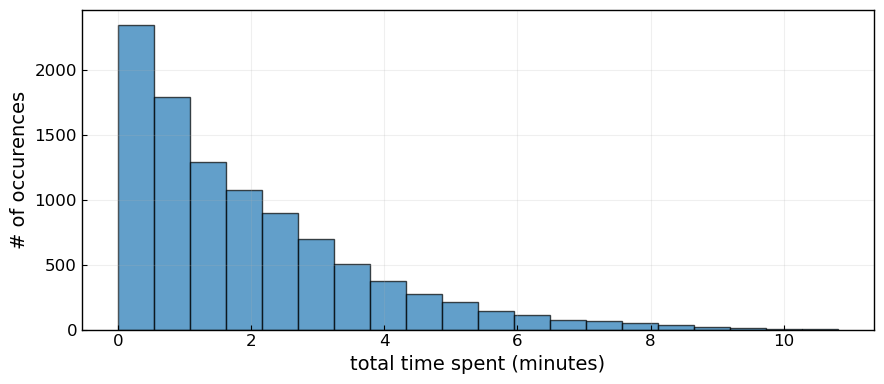

In [5]:
# Compare simulation to Poisson distribution
fig, ax = plt.subplots(figsize=(9,4), tight_layout=True)

# Plot histogram of waiting times
# plt.hist(total_time, bins=np.arange(0.25, np.floor(np.max(total_time))+0.25, 0.5), edgecolor='black', alpha=0.7)
plt.hist(total_time, bins=20, edgecolor='black', alpha=0.7)

plt.ylabel('# of occurences')
plt.xlabel('total time spent (minutes)')

plt.grid(alpha=.2)

plt.show()


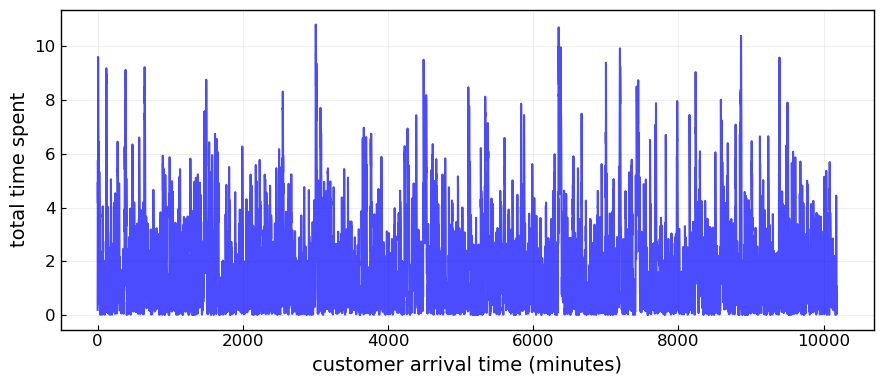

In [6]:
fig, ax = plt.subplots(figsize=(9,4), tight_layout=True)

# Plot total time
plt.plot(at, total_time, 'b', alpha=.7)
plt.xlabel('customer arrival time (minutes)')
plt.ylabel('total time spent')

plt.grid(alpha=.2)

plt.show()

### Compare with theoretical results

$L_{queue} = \frac{a}{b-a}.$

$T_{queue} = \frac{1}{b-a}$

$P(t) = e^{-t(b-a)}.$

In [7]:
print('ave_total_time = ', ave_total_time, '\ntheory = ', 1/(b-a))

ave_total_time =  1.9253426599196515 
theory =  2.0


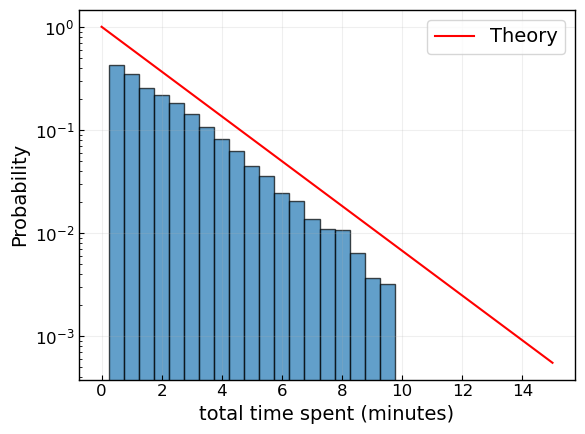

In [8]:
times=np.linspace(0,15,20)

plt.hist(total_time, bins=np.arange(0.25, np.floor(np.max(total_time))+0.25, 0.5), density=True, log=True, edgecolor='black', alpha=0.7)

plt.semilogy(times, np.exp(-times*(b-a)), 'r', label='Theory')

plt.ylabel( 'Probability')
plt.xlabel('total time spent (minutes)')

plt.grid(alpha=.2)

plt.legend()

plt.show()

## Gaussian service time

Now assume that  the serving time distribution is Gaussian. This is appropriate if the server takes more or less the same time with every customer, so that e.g. customers don't have wildly different orders.

In [9]:
a = 1. # average number of arrivals per minute

b = 1.5 # average number of people served per minute 

sigma_b = 0.1 # standard deviation of serving time

ncust = 10000 # number of customers

In [10]:
# Initialize arrays
at = np.empty((ncust, 1))
ft = np.empty((ncust, 1))


### CUSTOMER ARRIVAL TIMES ###

# Generate random arrival times assuming exponential arrival time distribution
r = np.random.uniform(low=0., high=1., size=(ncust, 1))
iat = -(1./a) * np.log(r)

#can also use numpy's random.exponential function to substitute the above two lines
#iat = np.random.exponential(1./a, ncust)

at[0] = iat[0] # arrival time of first customer
for i in range(1, ncust):
    at[i] = at[i-1] + iat[i]

#can also use numpy cumsum function
#at = np.cumsum(iat)
    


### CUSTOMER SERVICE TIMES ###

# Generate random service times for each customer
st = np.random.normal(loc=1/b, scale=sigma_b, size=(ncust, 1))
st = np.maximum(st, 0.1) # minimum service time is 0.1

# Compute time each customer finishes:
ft[0] = at[0] + st[0]
for i in range(1, ncust):

    # compute finish time for each customer as the larger of
    # arrival time plus service time (if no wait) and 
    # finish time of previous customer plus service time (if wait)
    ft[i] = np.maximum(at[i] + st[i], ft[i-1] + st[i])


### BASIC STATISTICS ###

total_time = ft - at # total time spent by each customer

wait_time = total_time - st # time spent waiting before being served

ave_service_time = np.mean(st)
ave_wait_time = np.mean(wait_time)
ave_total_time = np.mean(total_time)

print('ave_service_time = ', ave_service_time)
print('ave_wait_time = ', ave_wait_time)
print('ave_total_time = ', ave_total_time)

ave_service_time =  0.6655201839946617
ave_wait_time =  0.7034969905674753
ave_total_time =  1.3690171745621367


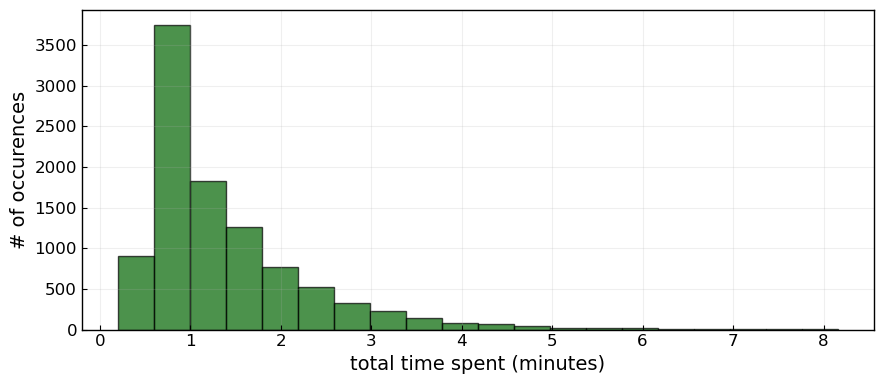

In [11]:
# Compare simulation to Poisson distribution
fig, ax = plt.subplots(figsize=(9,4), tight_layout=True)

# Plot histogram of waiting times
plt.hist(total_time, bins=20, color='darkgreen', edgecolor='black', alpha=0.7)
plt.ylabel('# of occurences')
plt.xlabel('total time spent (minutes)')

plt.grid(alpha=.2)

plt.show()


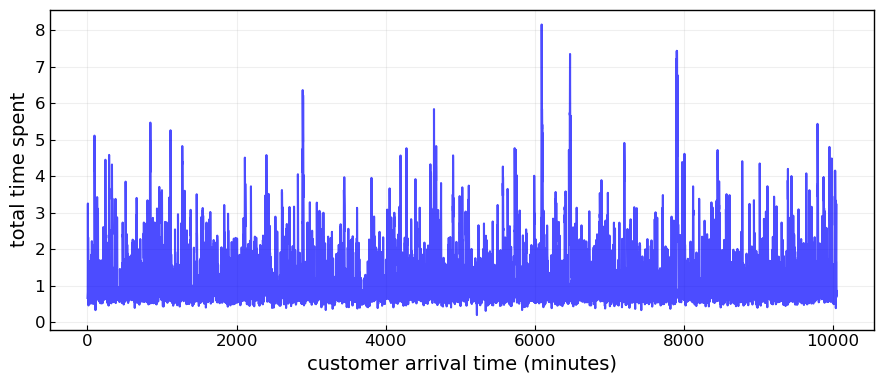

In [12]:
fig, ax = plt.subplots(figsize=(9,4), tight_layout=True)

# Plot total time
plt.plot(at, total_time, 'b', alpha=.7)
plt.xlabel('customer arrival time (minutes)')
plt.ylabel('total time spent')

plt.grid(alpha=.2)

plt.show()

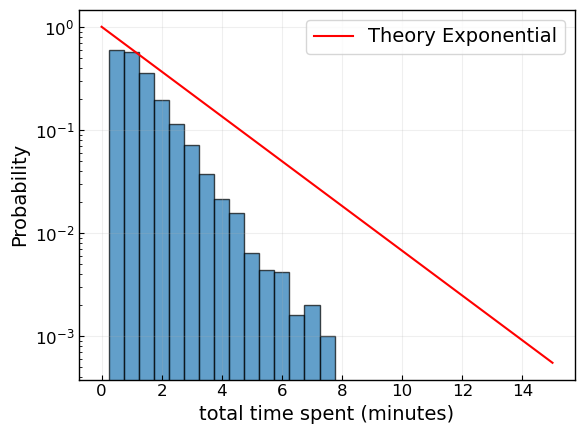

In [13]:
times=np.linspace(0,15,20)

plt.hist(total_time, bins=np.arange(0.25, np.floor(np.max(total_time))+0.25, 0.5), density=True, log=True, edgecolor='black', alpha=0.7)

plt.semilogy(times, np.exp(-times*(b-a)), 'r', label='Theory Exponential')

plt.ylabel( 'Probability')
plt.xlabel('total time spent (minutes)')

plt.grid(alpha=.2)

plt.legend()

plt.show()